# Biochemistry 570 Midterm Exam

Tyson Wheelwright

#### Question 1

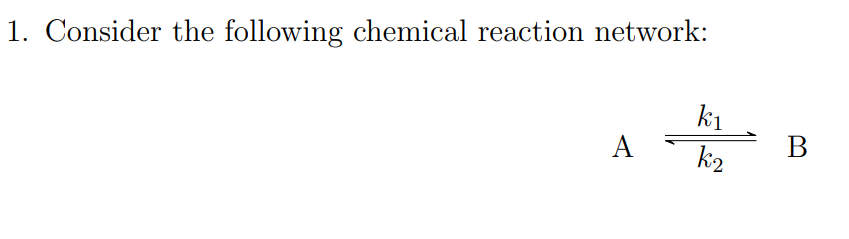

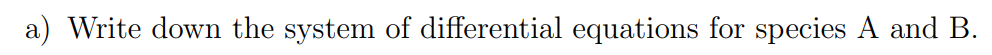

dadt = k2 * B - k1 * A  
dbdt = k1 * A - k2 * B  

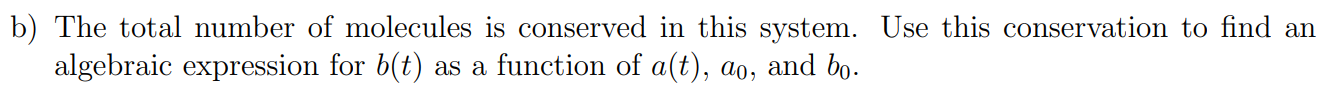

b(t) = A0 + B0 - a(t)

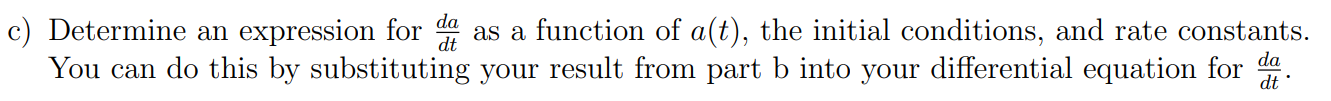

da(t)/dt = k2 * b(t) - k1 * a(t)  
da(t)/dt = k2 * (A0 + B0 - a(t)) - k1 * a(t)  
da(t)/dt = k2 * (A0 + B0) - (k1 + k2) * a(t)  
  
you can substitute A0 + B0 for T (which is the total concentration), then you get this:  
da(t)/dt = k2 * b(t) - k1 * a(t)  
da(t)/dt = k2 * (T - a(t)) - k1 * a(t)  
da(t)/dt = k2 * T - (k1 + k2) * a(t)  
  
I'm following the style of Phil's video, so:  
T = (A0 + B0)  
  
da(t)/dt = k2 * (A0 + B0) - (k1 + k2) * a(t)

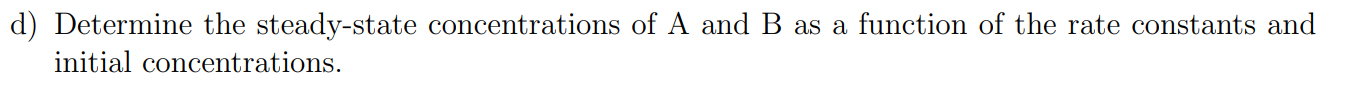

solving for a at steady state (ass)  
set it equal to 0  
0 = k2 * T - (k1 + k2) * ass  
subtract second term  
(k1 + k2) * ass = k2 * T  
divide by k1 + k2  
ass = (k2 * T) / (k1 + k2)  
you can substitue the initial conditions back in for t  
ass = (k2 *(a0 + b0)) / (k1 + k2)  
  
solving for b at steady state (bss)  
we know  
bss = Keq * ass   
also    
Keq = k1 / k2    
so   
bss = (k1 / k2) * ass  
we know what ass is, so we substitute that in  
bss = (k1 * T) / (k1 + k2)   
we can put the initial concentrations back in for T  
bss = (k1 * (a0 + b0)) / (k1 + k2)  
this makes sense that it's so similar to ass becuase it's a symmetric rxn   

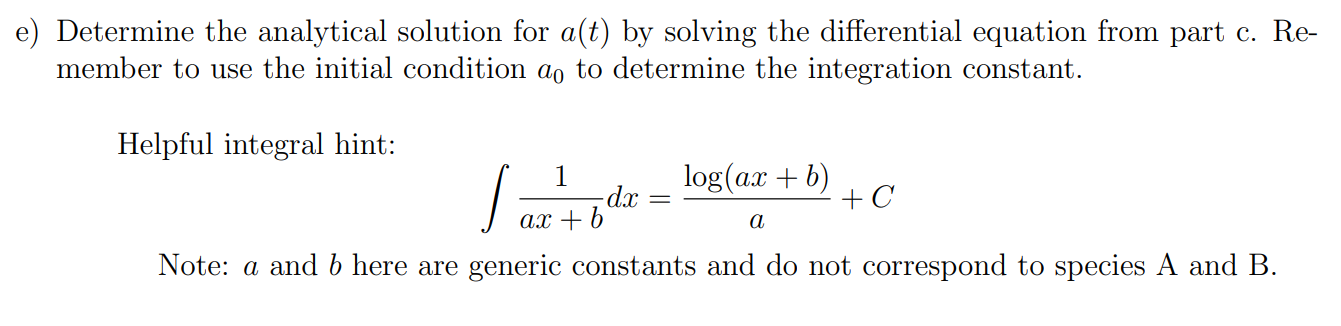

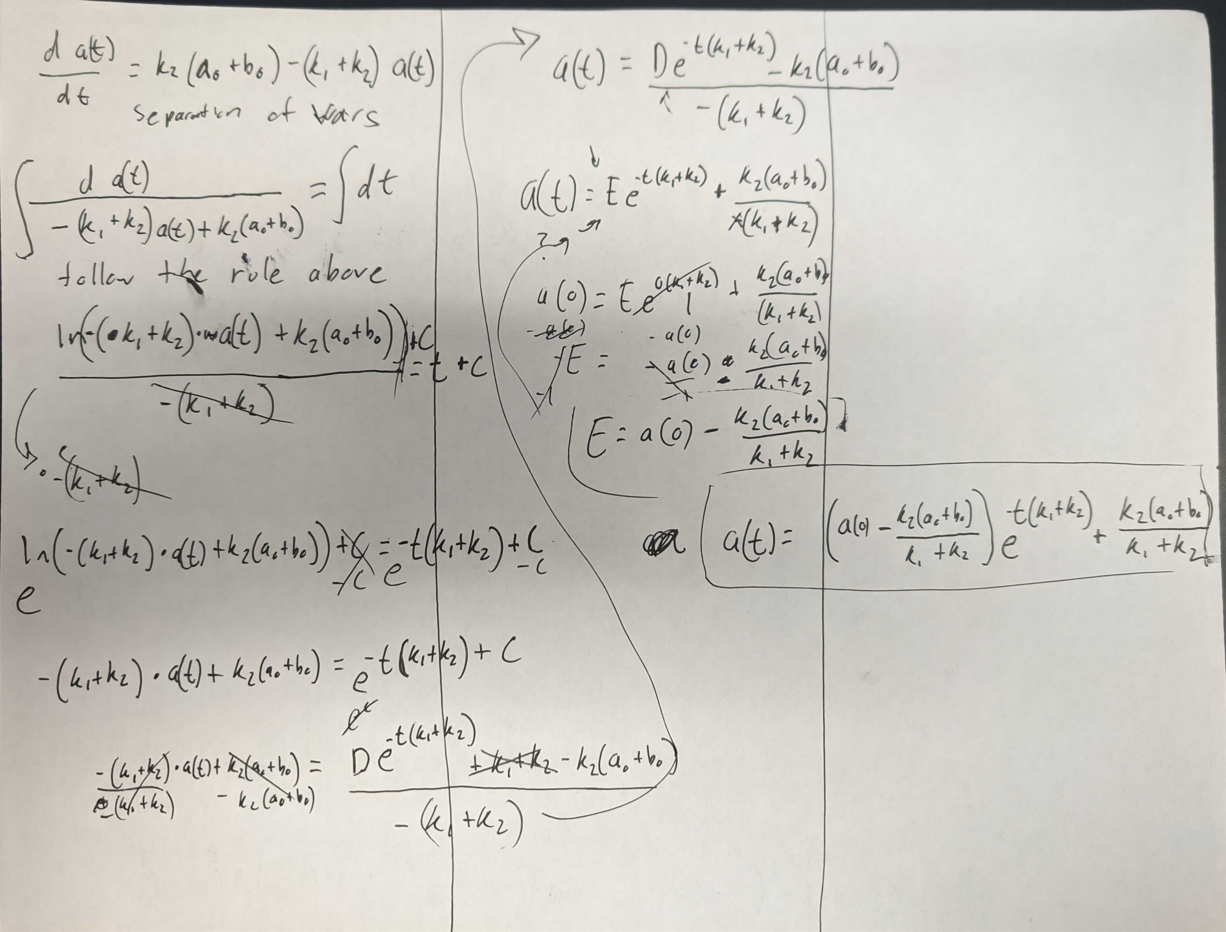

#### Question 2

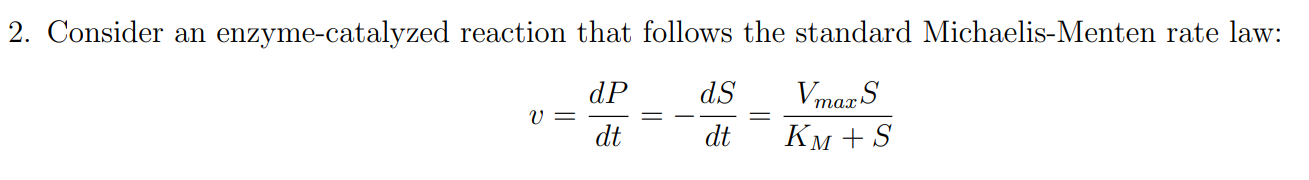

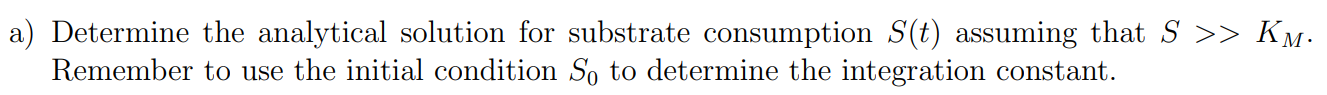

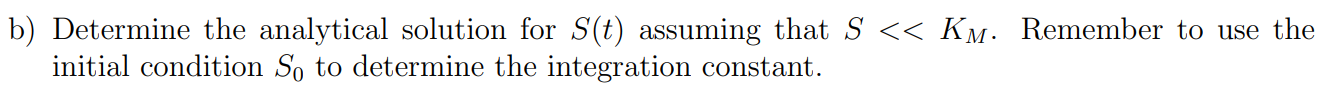

#### Question 3

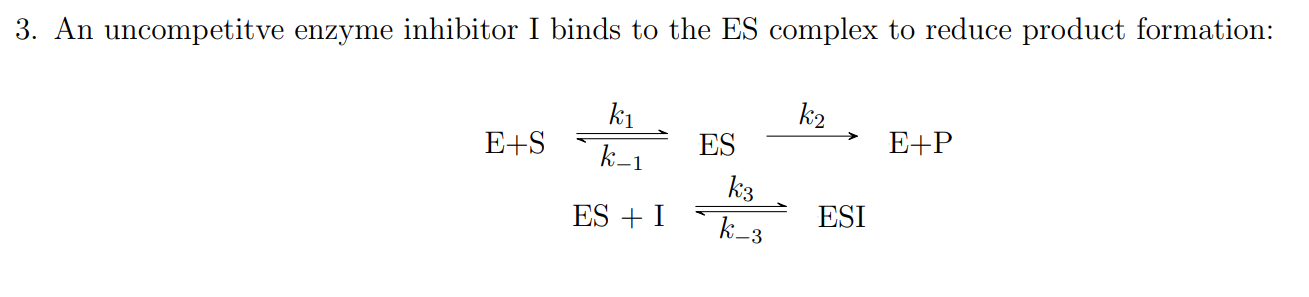

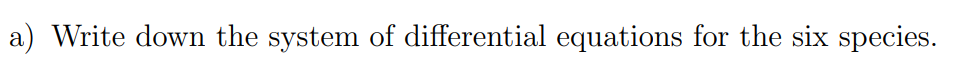

dedt = - k1 * e * s + kn1 * es + k2 * es    
dsdt = -k1 * e * s + kn1 * es  
desdt = k1 * e * s - kn1 * es - k2 * es - k3 * es * I + kn3 * esi  
dpdt = k2 * es  
dIdt = - k3 * es * I + kn3 * esi  
desidt = - kn3 * esi + k3 * es * I  

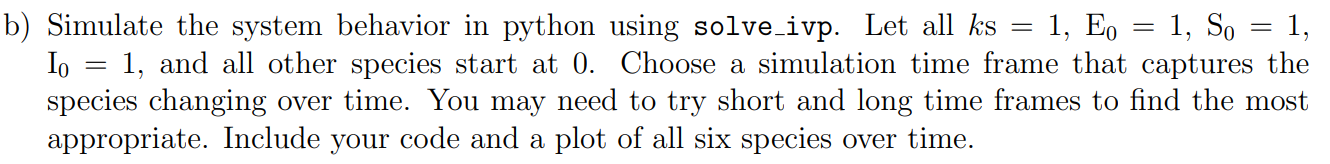

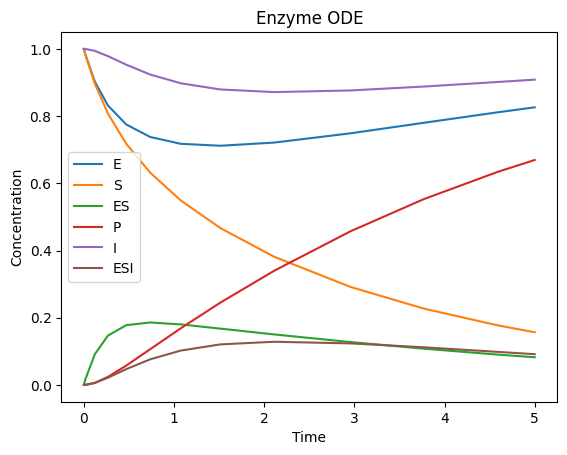

In [29]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


def enzyme_ODE(t, y):
    #takes in the species

    e,s,es,p,I,esi = y # unpack y

    # parameters
    k1 = 1
    kn1 = 1
    k2 = 1 
    k3 = 1 
    kn3 = 1

    # differential equations
    dedt = - k1 * e * s + kn1 * es + k2 * es
    dsdt = -k1 * e * s + kn1 * es  
    desdt = k1 * e * s - kn1 * es - k2 * es - k3 * es * I + kn3 * esi  
    dpdt = k2 * es  
    dIdt = - k3 * es * I + kn3 * esi  
    desidt = - kn3 * esi + k3 * es * I  

    #outputs the deriviates for each of the species
    dydt = [dedt, dsdt, desdt, dpdt, dIdt, desidt] # repack dydt
    # the Y var needs to be the same size as the dydt!

    return dydt

# the time interval of the simulation
tspan = [0,5]

# set initial conditions
y = [1,1,0,0,1,0] # 'E', 'S', 'ES', 'P', 'I', 'ESI'

# integrate the ODE
sol = solve_ivp(enzyme_ODE, tspan, y)

#plot the results
plt.plot(sol.t, sol.y.T) #the T is the transpose to get the dimensions right for plotting
plt.legend(['E', 'S', 'ES', 'P', 'I', 'ESI'])
plt.title('Enzyme ODE')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

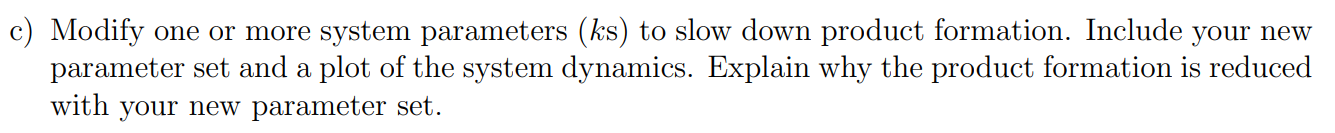

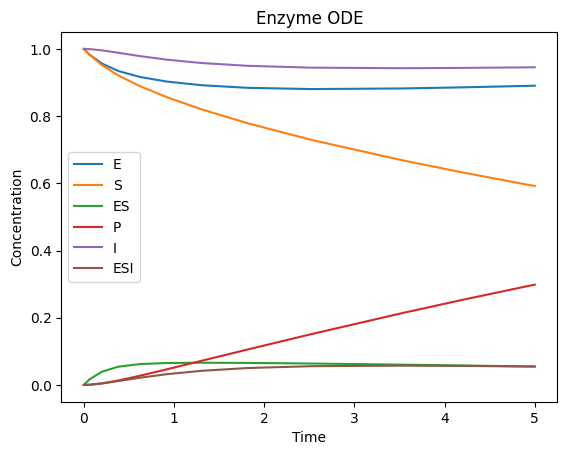

In [30]:
def enzyme_ODE(t, y):
    #takes in the species

    e,s,es,p,I,esi = y # unpack y

    # parameters
    '''MODIFIED k1 & k2'''
    k1 = 0.3 #used to be 1
    kn1 = 2 #used to be 1
    k2 = 1 
    k3 = 1 
    kn3 = 1

    # differential equations
    dedt = - k1 * e * s + kn1 * es + k2 * es
    dsdt = -k1 * e * s + kn1 * es  
    desdt = k1 * e * s - kn1 * es - k2 * es - k3 * es * I + kn3 * esi  
    dpdt = k2 * es  
    dIdt = - k3 * es * I + kn3 * esi  
    desidt = - kn3 * esi + k3 * es * I  

    #outputs the deriviates for each of the species
    dydt = [dedt, dsdt, desdt, dpdt, dIdt, desidt] # repack dydt
    # the Y var needs to be the same size as the dydt!

    return dydt

# the time interval of the simulation
tspan = [0,5]

# set initial conditions
y = [1,1,0,0,1,0] # 'E', 'S', 'ES', 'P', 'I', 'ESI'

# integrate the ODE
sol = solve_ivp(enzyme_ODE, tspan, y)

#plot the results
plt.plot(sol.t, sol.y.T) #the T is the transpose to get the dimensions right for plotting
plt.legend(['E', 'S', 'ES', 'P', 'I', 'ESI'])
plt.title('Enzyme ODE')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

Why is it reduced?  
The rate at which the product is produced depends on the rate (k1) of the formation of the enzyme substrate complex (ES).  
I lowered this rate, which means that the concentration of the enzyme substrate complex (ES) will be lowered.  
A lower amount of ES means that the rate that EP is formed is also lowered.  
  
I also increased the rate (kn1) of the backwards rxn. So now instead of proceeding to the product, ES is more likely than before to just let go of the enzyme and substrate without forming the product.   
This means that the product will form more slowly.

#### Question 4

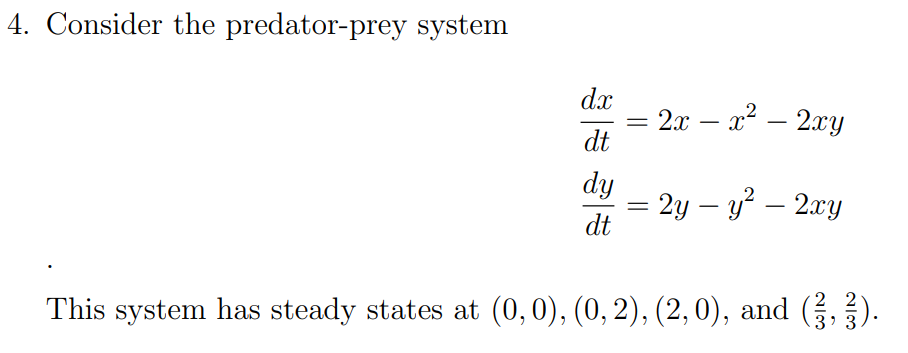

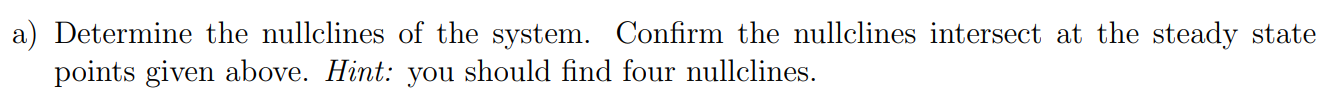

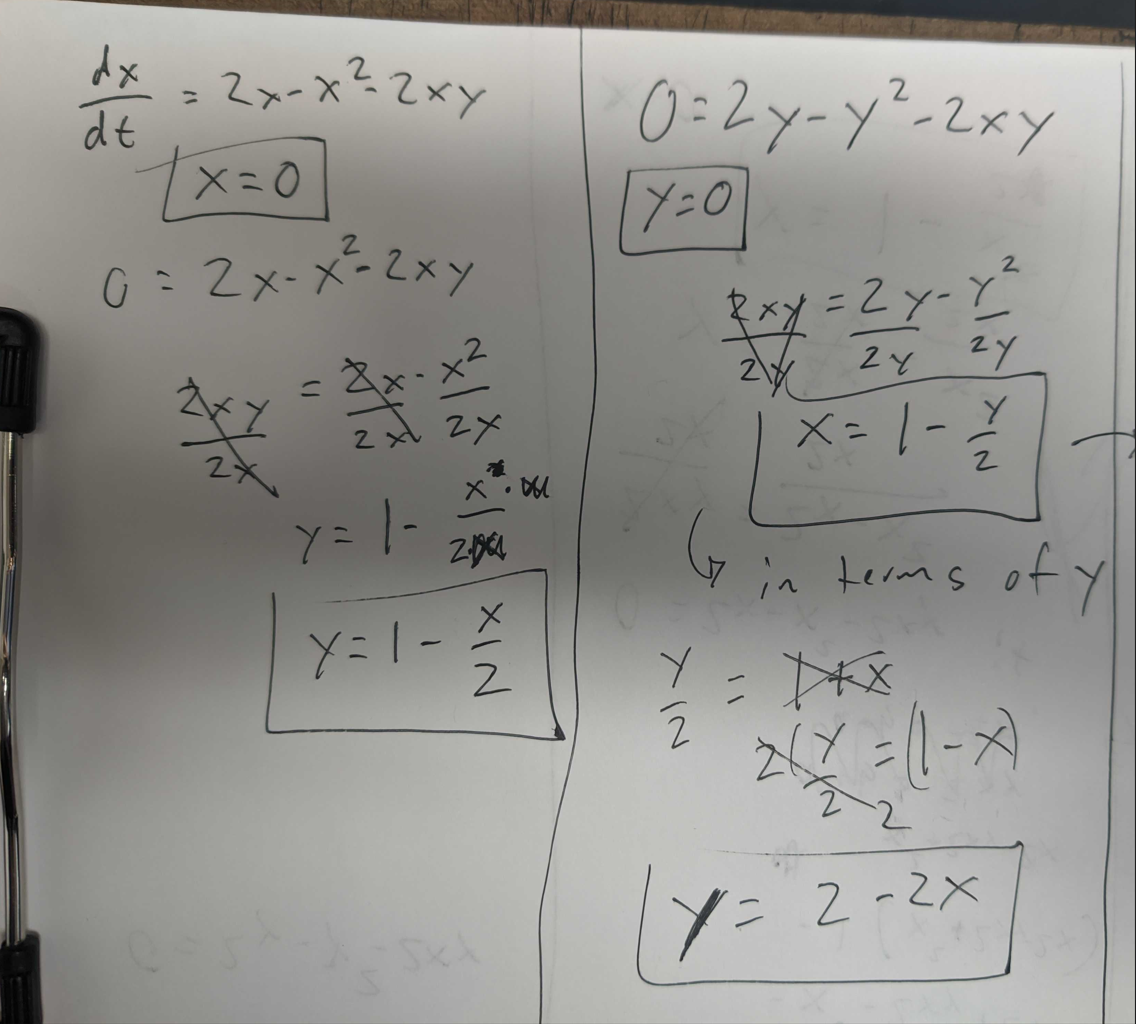

I confirmed the nullclines intersected by looking at the graph. (It didn't say we had to do it analytically, right?)

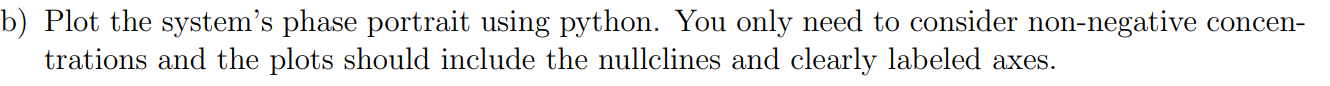

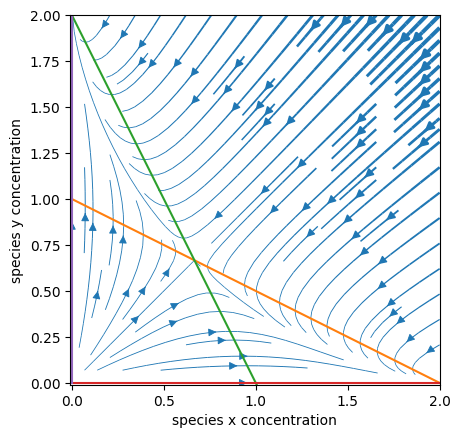

In [43]:
import numpy as np
import matplotlib.pyplot as plt
def predator_prey_system(Y, t):
    x,y = Y
    dxdt = 2 * x - (x**2) - 2 * x * y
    dydt = 2 * y - (y**2) - 2 * x * y
    rtn_dydt = [dxdt,dydt]
    
    return rtn_dydt
    
def plot_flow_field(ODE, u_range, v_range, n_grid=100):
    """
    Plots the flow field with line thickness proportional to speed.
    
    Parameters
    ----------
    ODE : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    u_range : array_like, shape (2,)
        Range of values for u-axis.
    v_range : array_like, shape (2,)
        Range of values for v-axis.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    ax = plt.axes()
    
    # Set up u,v space
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)
    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)

    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = ODE(np.array([uu[i,j], vv[i,j]]), None)
    # Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)
    # Make linewidths proportional to speed, with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()
    # Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.2, density=1)#, color='thistle')
    return ax


ax = plot_flow_field(predator_prey_system, (0,2), (0,2))
ax.set_xlabel('species x concentration')
ax.set_ylabel('species y concentration')
ax.set_aspect('equal') 


#nullcline 1
x1  = np.linspace(0,2)
y1 = 1 - (x1/2)
ax.plot(x1, y1)
#nullcline 2
x2 = np.linspace(0,2)
y2 = 2 - 2 * x2
ax.plot(x2, y2)
#nullcline 3
x3 = np.linspace(0,2)
y3 = x3 * 0 #there are other ways to do this, but this is what worked for me.
ax.plot(x3, y3)
#nullcline 4
y4 = np.linspace(2,0)
x4 = y4 * 0
ax.plot(x4, y4)

#limit the shape of the plot
plt.axis([-0.01,2,-0.01,2]) #I changed it so that I could actually see the nullclines


plt.show()

In [ ]:
#make sure to check that your nullclines look like they cross at the exact SS numbers

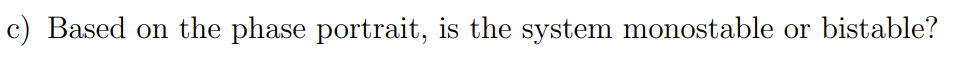

It is bistable. (You can see the arrows moving to the stability point at (0,2) and (2,0).)